<a href="https://colab.research.google.com/github/mrishikreddy/Projects/blob/main/Prediction_of_CO2_emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
from sklearn.metrics import r2_score


In [ ]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2025-02-14 11:14:23--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.03s   

2025-02-14 11:14:23 (2.21 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [ ]:
df = pd.read_csv("FuelConsumption.csv")
print(df.head(10))

   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   
5       2014  ACURA         RLX     MID-SIZE         3.5          6   
6       2014  ACURA          TL     MID-SIZE         3.5          6   
7       2014  ACURA      TL AWD     MID-SIZE         3.7          6   
8       2014  ACURA      TL AWD     MID-SIZE         3.7          6   
9       2014  ACURA         TSX      COMPACT         2.4          4   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2       

In [ ]:
cdf = df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
print(cdf.head())

   ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_COMB  \
0         2.0          4                   9.9                   8.5   
1         2.4          4                  11.2                   9.6   
2         1.5          4                   6.0                   5.9   
3         3.5          6                  12.7                  11.1   
4         3.5          6                  12.1                  10.6   

   CO2EMISSIONS  
0           196  
1           221  
2           136  
3           255  
4           244  


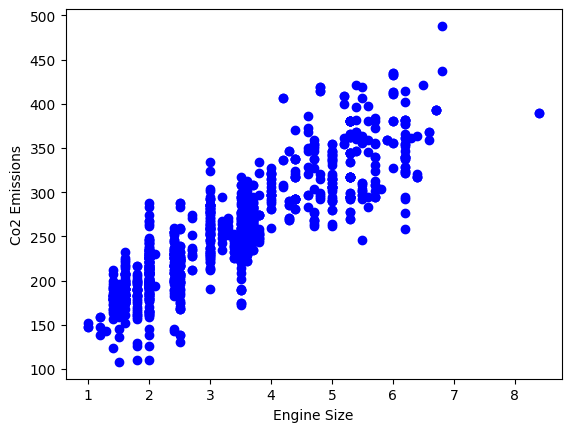

In [ ]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emissions')
plt.show()

In [ ]:
msk = np.random.rand(len(cdf)) <0.8
train = cdf[msk]
test = cdf[~msk]

In [ ]:
regr = lm.LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_COMB"]])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)
print("m:",regr.coef_)
print("C:",regr.intercept_)

m: [[10.80240221  7.54456547  1.80872034  7.28202798]]
C: [68.07596832]


In [ ]:
x = np.asanyarray(test[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_COMB"]])
y = np.asanyarray(test[["CO2EMISSIONS"]])
y_result = regr.predict(x)
SME = np.mean(y_result-y)**2
print("SME : %.2f "%SME)
print("r2 score : %.2f"%r2_score(y,y_result))

SME : 0.24 
r2 score : 0.88


In [ ]:
dx = np.asanyarray([[2,4,9.9,8.5]])
ry = regr.predict(dx)
print(ry)

[[199.66260384]]
